# Import libraries

In [2]:
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

/Users/mdfahimulkabirchowdhury/Github-Fahimul/Credit Card Fraud Detection/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Load dataset

In [3]:
# Download latest version of the dataset
path = kagglehub.dataset_download("nelgiriyewithana/credit-card-fraud-detection-dataset-2023")

# Locate the CSV file within the downloaded path
csv_file = [f for f in os.listdir(path) if f.endswith('.csv')][0]

# Load the CSV file into the data variable
data = pd.read_csv(os.path.join(path, csv_file))

print("Dataset loaded successfully.")

100%|██████████| 143M/143M [00:07<00:00, 20.8MB/s] 

Extracting files...


Dataset loaded successfully.


In [4]:
data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [5]:
data.shape

(568630, 31)

In [6]:
data.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.323544e-16,-3.518788e-17,-2.879008e-17,7.197521e-18,-3.838678e-17,-3.198898e-17,2.069287e-17,9.116859e-17,...,4.758361e-17,5.398140e-18,5.395017e-18,-1.999311e-18,-3.028957e-17,-7.547400e-18,-3.598760e-17,2.499139e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


# Data Preprocessing

In [7]:
# Count duplicate rows
duplicate_count = data.duplicated().sum()

# Count rows with any null values
null_count = data.isnull().any(axis=1).sum()

# Display counts
print("Number of duplicate rows:", duplicate_count)
print("Number of rows with null values:", null_count)

# Remove duplicate rows
data = data.drop_duplicates()

# Remove rows with any null values
data = data.dropna()

# Display the shape of the cleaned dataset to confirm
print("Data shape after removing duplicates and nulls:", data.shape[0])

Number of duplicate rows: 0
Number of rows with null values: 0
Data shape after removing duplicates and nulls: 568630


Number of duplicate rows: 0
Number of rows with null values: 0


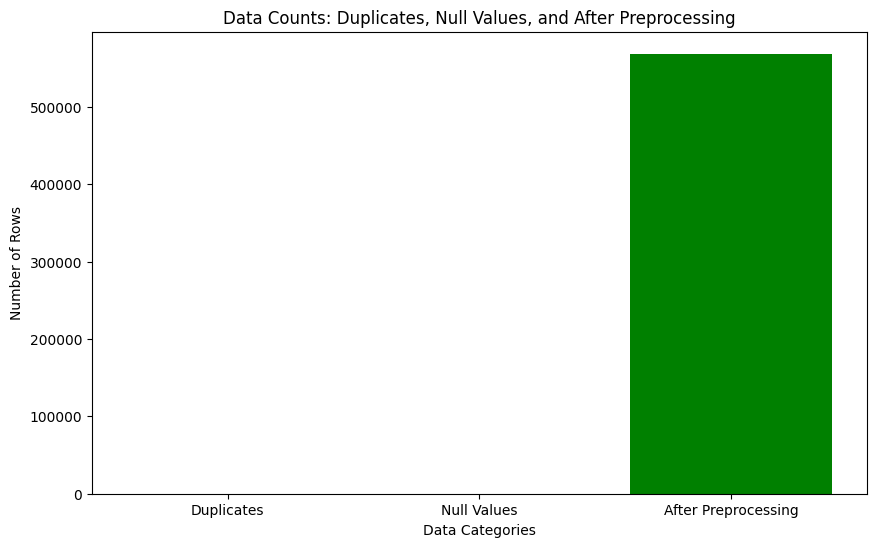

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into 'data' (update 'path_to_your_dataset.csv' with your actual file path)
# data = pd.read_csv('path_to_your_dataset.csv')

# Initial counts
duplicate_count = data.duplicated().sum()
null_count = data.isnull().any(axis=1).sum()

# Display counts
print("Number of duplicate rows:", duplicate_count)
print("Number of rows with null values:", null_count)

initial_count = data.shape[0]

# Remove duplicates and nulls for preprocessing
data = data.drop_duplicates()
data = data.dropna()
after_processing_count = data.shape[0]

# Prepare data for plotting
categories = ['Duplicates', 'Null Values', 'After Preprocessing']
values = [duplicate_count, null_count, after_processing_count]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color=['red', 'orange', 'green'])
plt.xlabel('Data Categories')
plt.ylabel('Number of Rows')
plt.title('Data Counts: Duplicates, Null Values, and After Preprocessing')
plt.show()

# Data analysis

### Data distribution

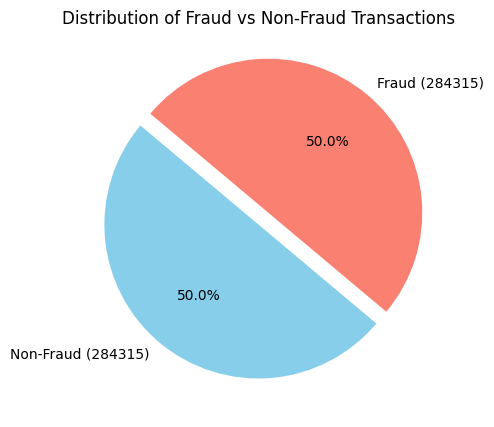

In [9]:
# Count the occurrences of each class
fraud_count = data['Class'].value_counts()

# Step 3: Labels with counts
labels = [f'Non-Fraud ({fraud_count[0]})', f'Fraud ({fraud_count[1]})']
colors = ['skyblue', 'salmon']

# Step 4: Plotting the pie chart
plt.figure(figsize=(8, 5))
plt.pie(fraud_count, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=(0, 0.1))
plt.title('Distribution of Fraud vs Non-Fraud Transactions')
plt.show()

### Fraud count

In [10]:
# Count the number of fraudulent transactions (Class = 1)
fraud_count = data[data['Class'] == 1].shape[0]

# Display the count
print("Number of fraudulent transactions (Class = 1):", fraud_count)

Number of fraudulent transactions (Class = 1): 284315


In [11]:
# Display the first few rows of fraudulent transactions
fraud_count = data[data['Class'] == 1]
print("First few fraudulent transactions:")
fraud_count.head()


First few fraudulent transactions:


,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,541,-0.478427,0.142165,-0.046838,0.683350,0.067820,-0.404898,-0.206496,0.184366,-0.762935,...,0.098977,-0.075191,-0.481489,0.678900,-0.011520,0.409021,0.075859,-0.447139,1534.53,1
623,623,-0.617111,-1.733888,1.150655,0.207829,0.903533,-0.171524,0.551679,-0.167744,0.338861,...,0.153856,0.369734,1.471004,-0.497633,0.377656,-0.328051,-0.512415,-0.013653,10554.68,1
4920,4920,-0.476617,0.088942,0.326333,0.220370,-0.026730,0.432409,0.646165,-0.240646,0.356997,...,-0.223141,-0.851929,0.153117,-0.127032,-0.334872,-1.353308,-0.192302,-0.470796,2785.98,1
6108,6108,-0.832953,-0.024254,-0.260967,0.323532,-0.117119,-0.589167,-0.390612,-0.207889,0.351702,...,0.120451,0.121804,-0.453630,-0.064071,0.331833,-1.671579,-1.060239,1.939783,15897.18,1
6329,6329,1.020308,0.425645,-0.554113,0.868349,2.367343,-0.360087,1.185828,-0.261569,-0.159521,...,-0.258401,-0.661236,-0.663639,-2.536292,2.502489,1.195597,-0.249226,0.254373,3492.59,1


### Distributions for V1 to V28 for fraud and non-fraud transactions

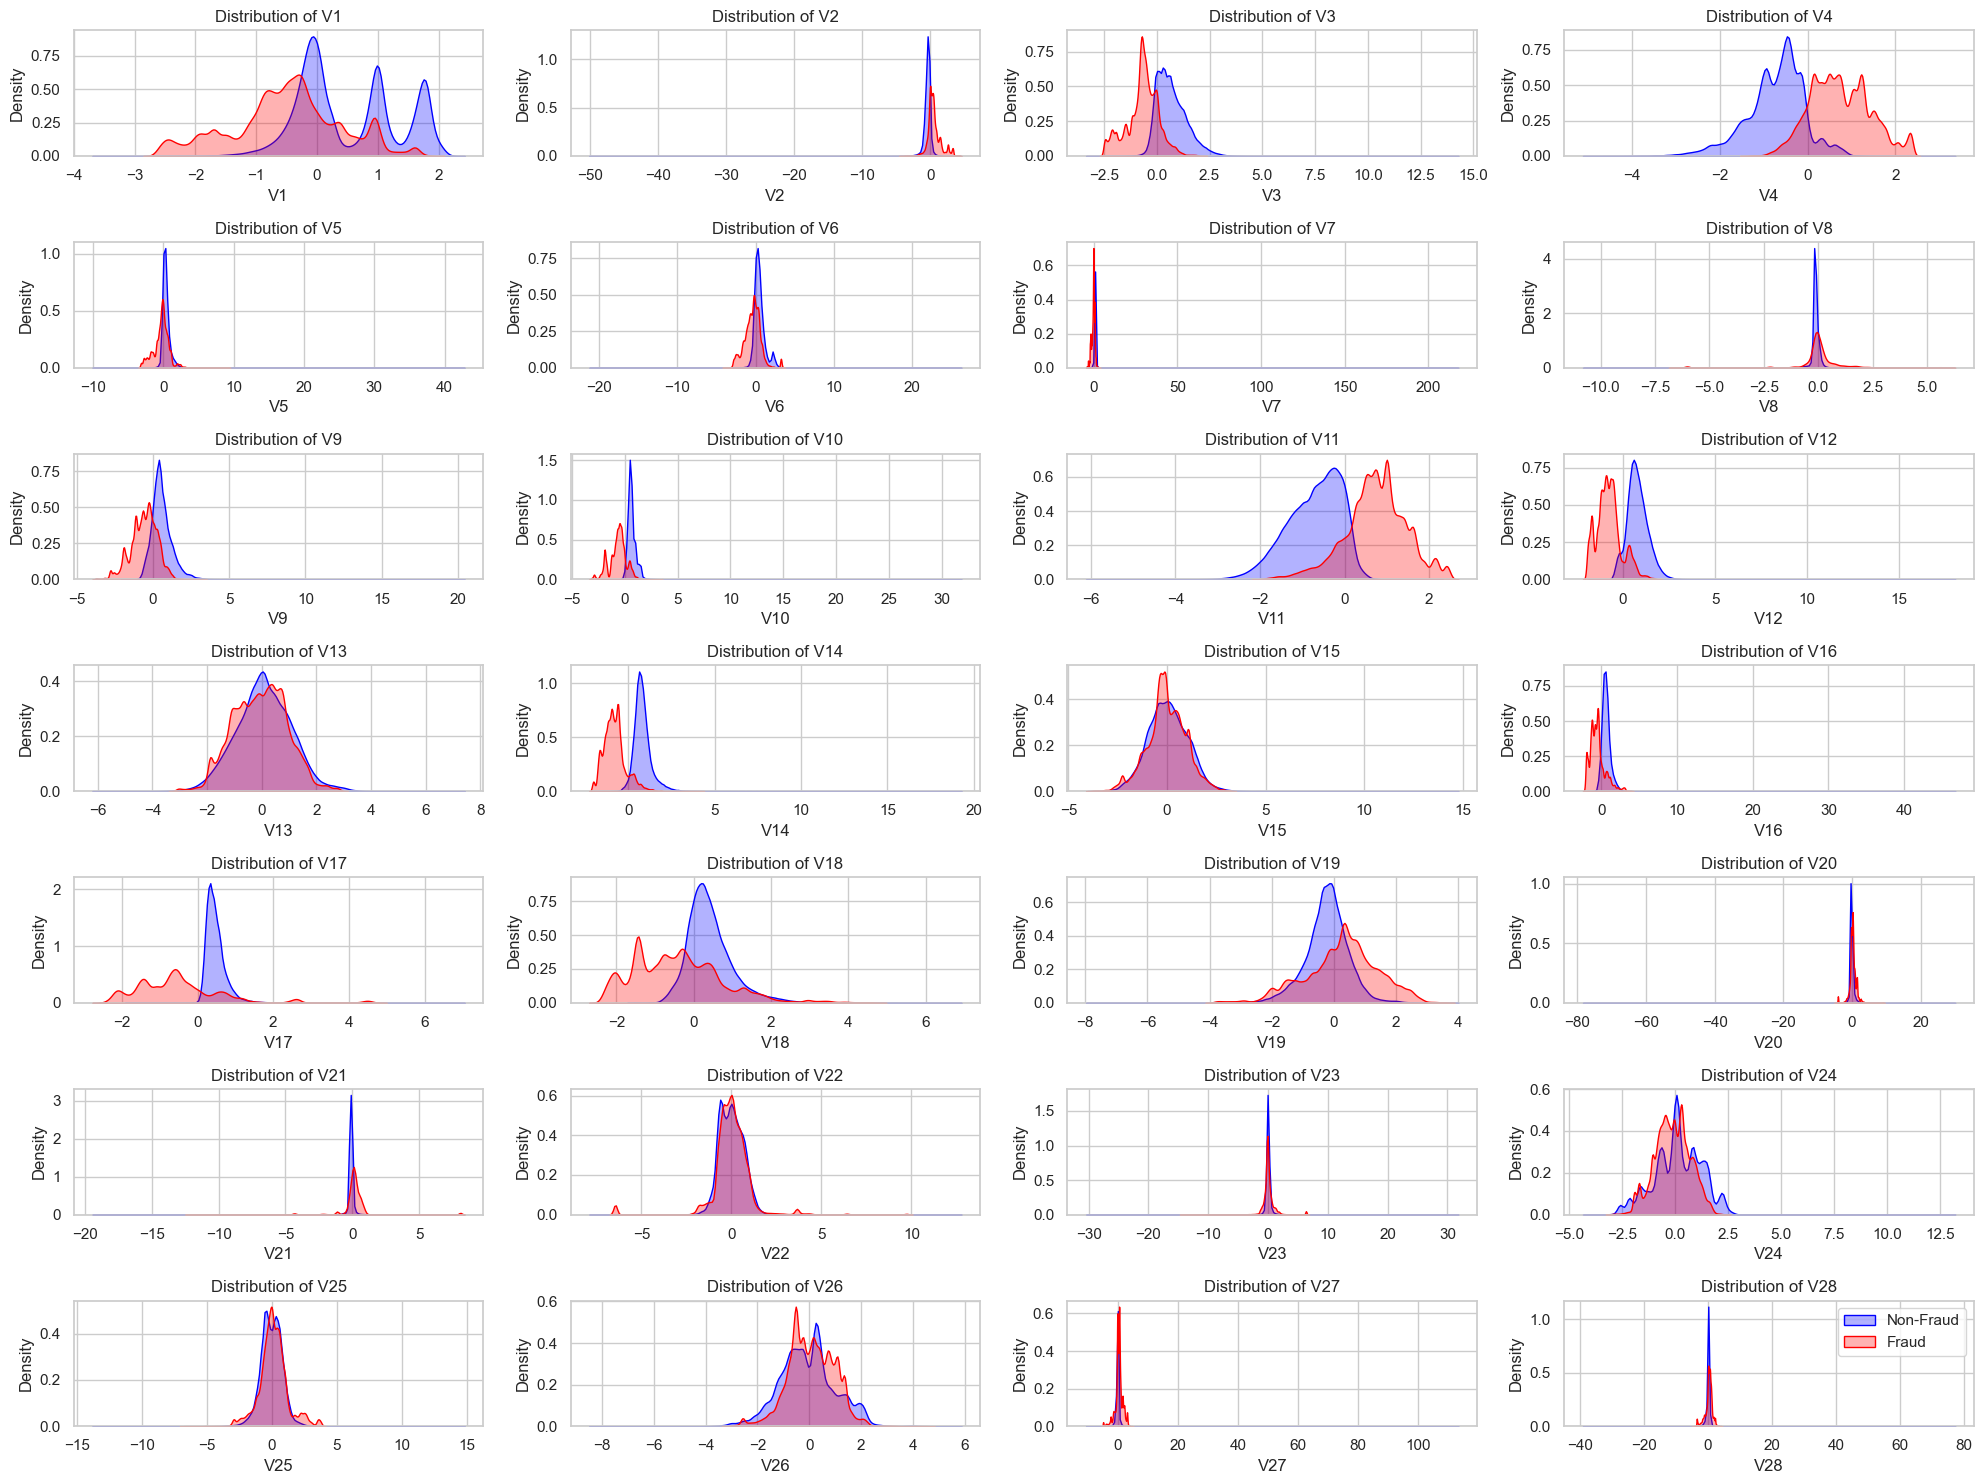

In [12]:
# Load the dataset (update 'path_to_your_dataset.csv' to the actual file path)
# data = pd.read_csv('path_to_your_dataset.csv')

# Set the plotting style
sns.set(style="whitegrid")

# Plot distribution of V1 to V28 for Fraud vs Non-Fraud
plt.figure(figsize=(20, 15))
for i in range(1, 29):  # V1 to V28
    plt.subplot(7, 4, i)
    feature = f'V{i}'
    sns.kdeplot(data[data['Class'] == 0][feature], label="Non-Fraud", color="blue", fill=True, alpha=0.3)
    sns.kdeplot(data[data['Class'] == 1][feature], label="Fraud", color="red", fill=True, alpha=0.3)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')

plt.tight_layout()
plt.legend(loc='upper right')
plt.show()

In [13]:
# # Set the plotting style
# sns.set(style="whitegrid")

# # Plot distribution of V1 to V28 for Fraud vs Non-Fraud in a two-column layout
# plt.figure(figsize=(14, 60))  # Set a large figure height to accommodate all subplots

# for i in range(1, 29):  # V1 to V28
#     plt.subplot(14, 2, i)  # Arrange in a grid of 14 rows and 2 columns
#     feature = f'V{i}'
#     sns.kdeplot(data[data['Class'] == 0][feature], label="Non-Fraud", color="blue", fill=True, alpha=0.3)
#     sns.kdeplot(data[data['Class'] == 1][feature], label="Fraud", color="red", fill=True, alpha=0.3)
#     plt.title(f'Distribution of {feature}')
#     plt.xlabel(feature)
#     plt.ylabel('Density')

# plt.tight_layout()
# plt.legend(loc='upper right', bbox_to_anchor=(1.1, 6.5))  # Position legend outside the plot grid
# plt.show()

### Correlation Analysis

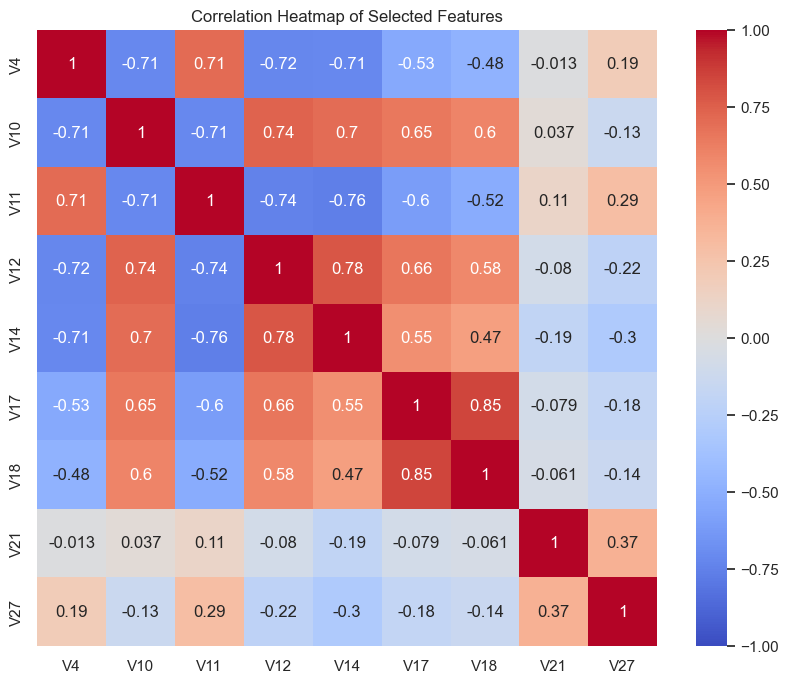

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select features for correlation analysis
selected_features = ['V4', 'V10', 'V11', 'V12', 'V14', 'V17', 'V18', 'V21', 'V27']
correlation_matrix = data[selected_features].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Selected Features")
plt.show()

### Box Plots for Fraud vs. Non-Fraud

/var/folders/cy/rbvbhftd10z1_psbzn5n8gfh0000gp/T/ipykernel_31933/489877597.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y=feature, data=data, palette="Set2")
/var/folders/cy/rbvbhftd10z1_psbzn5n8gfh0000gp/T/ipykernel_31933/489877597.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y=feature, data=data, palette="Set2")
/var/folders/cy/rbvbhftd10z1_psbzn5n8gfh0000gp/T/ipykernel_31933/489877597.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y=feature, data=data, palette="Set2")
/var/folders/cy/rbv

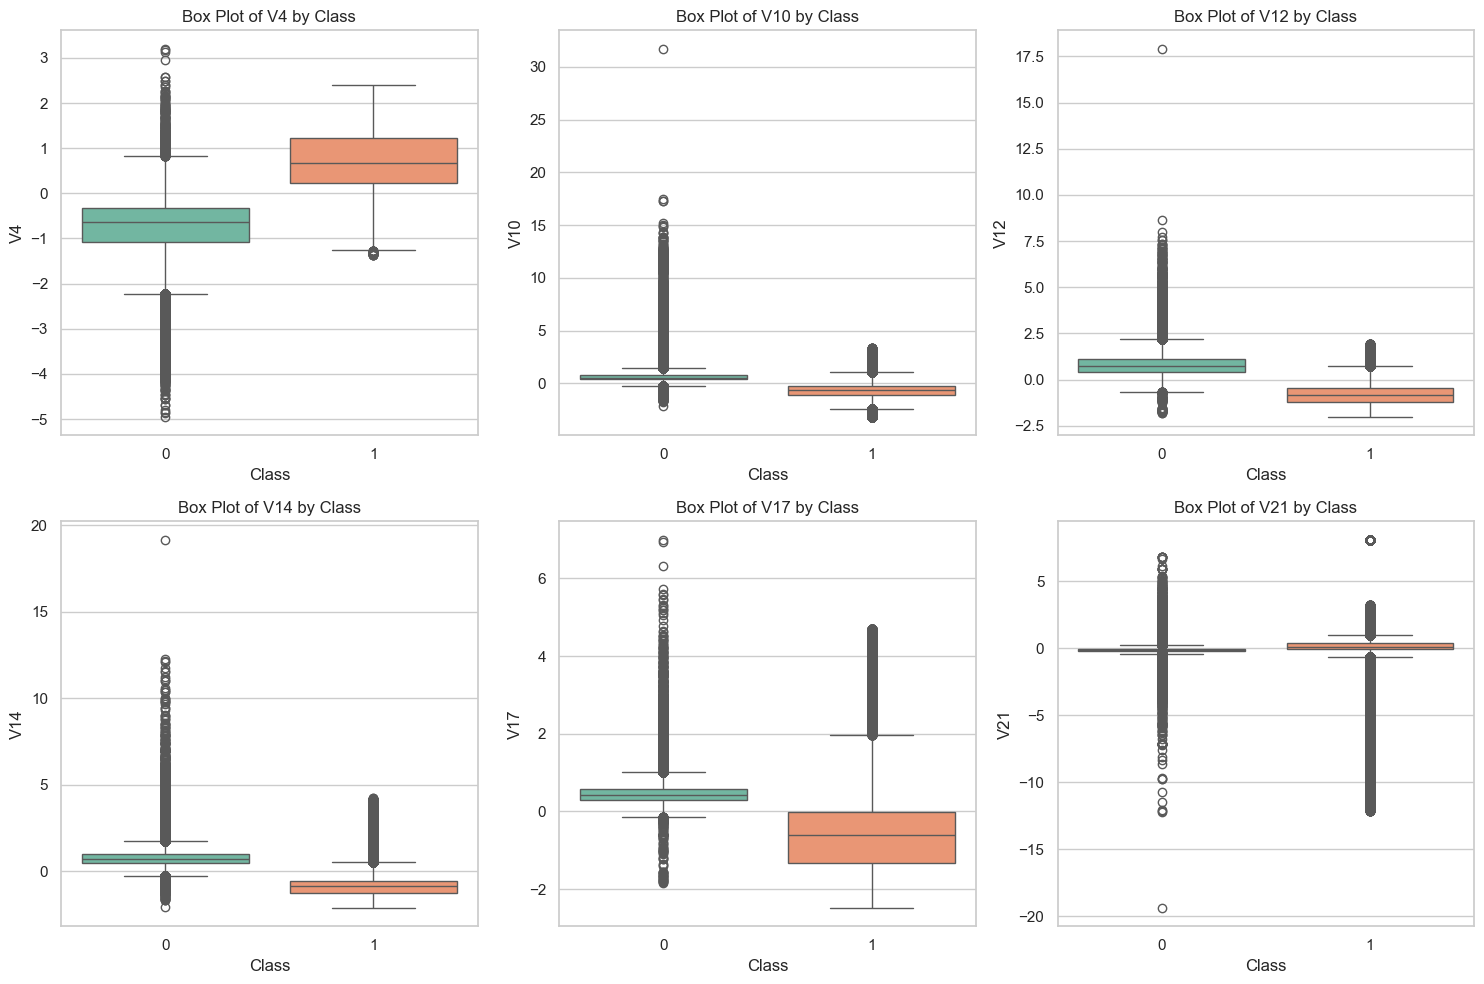

In [15]:
# Plot box plots for each selected feature comparing Fraud vs. Non-Fraud
plt.figure(figsize=(15, 10))
for i, feature in enumerate(['V4', 'V10', 'V12', 'V14', 'V17', 'V21'], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Class', y=feature, data=data, palette="Set2")
    plt.title(f'Box Plot of {feature} by Class')
plt.tight_layout()
plt.show()

### Outlier Analysis

/var/folders/cy/rbvbhftd10z1_psbzn5n8gfh0000gp/T/ipykernel_31933/3963532195.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y=feature, data=data, palette="Set1")
/var/folders/cy/rbvbhftd10z1_psbzn5n8gfh0000gp/T/ipykernel_31933/3963532195.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y=feature, data=data, palette="Set1")
/var/folders/cy/rbvbhftd10z1_psbzn5n8gfh0000gp/T/ipykernel_31933/3963532195.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y=feature, data=data, palette="Set1")
/var/folders/cy/

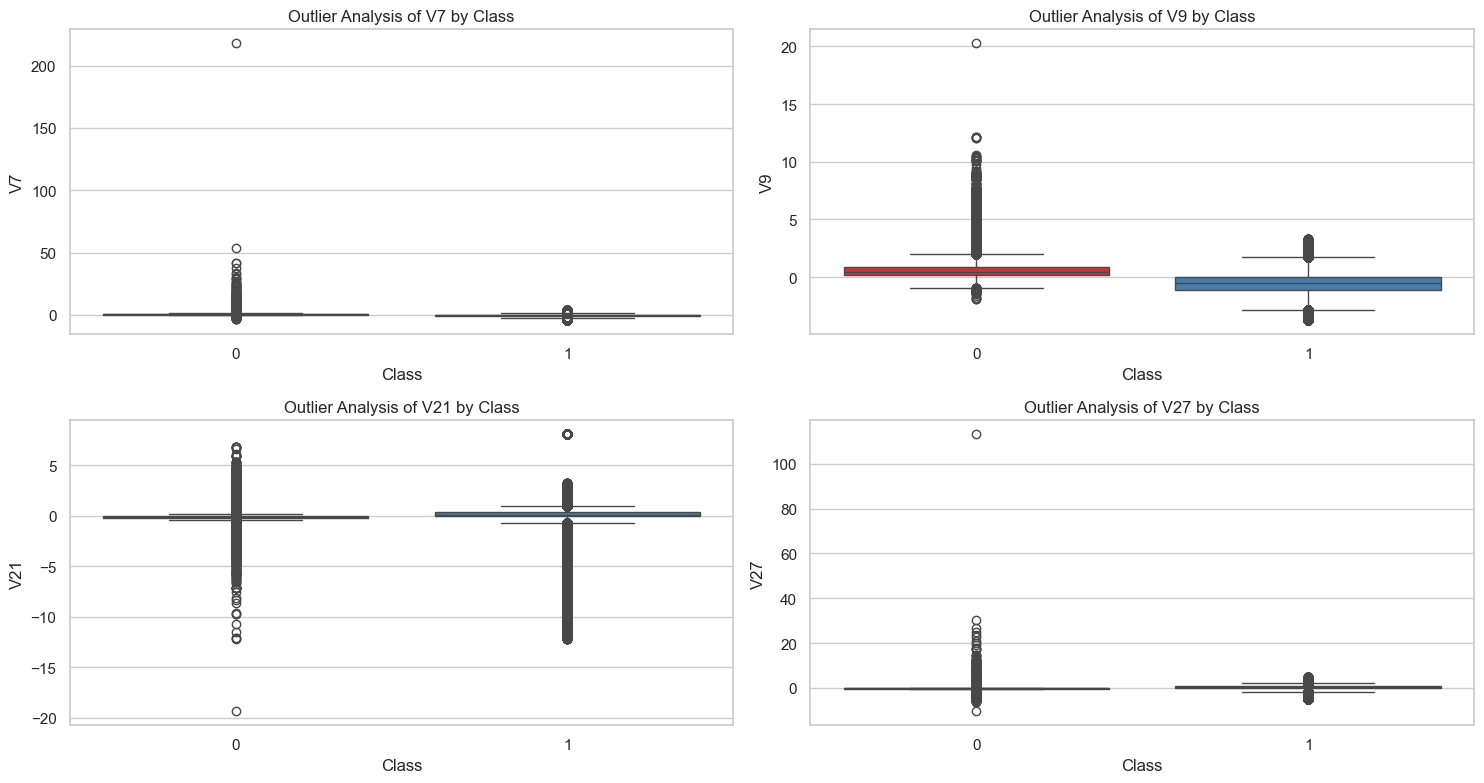

In [16]:
# Outlier analysis for features with outliers
outlier_features = ['V7', 'V9', 'V21', 'V27']
plt.figure(figsize=(15, 8))
for i, feature in enumerate(outlier_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Class', y=feature, data=data, palette="Set1")
    plt.title(f'Outlier Analysis of {feature} by Class')
plt.tight_layout()
plt.show()

### Pair Plot for Feature Interactions

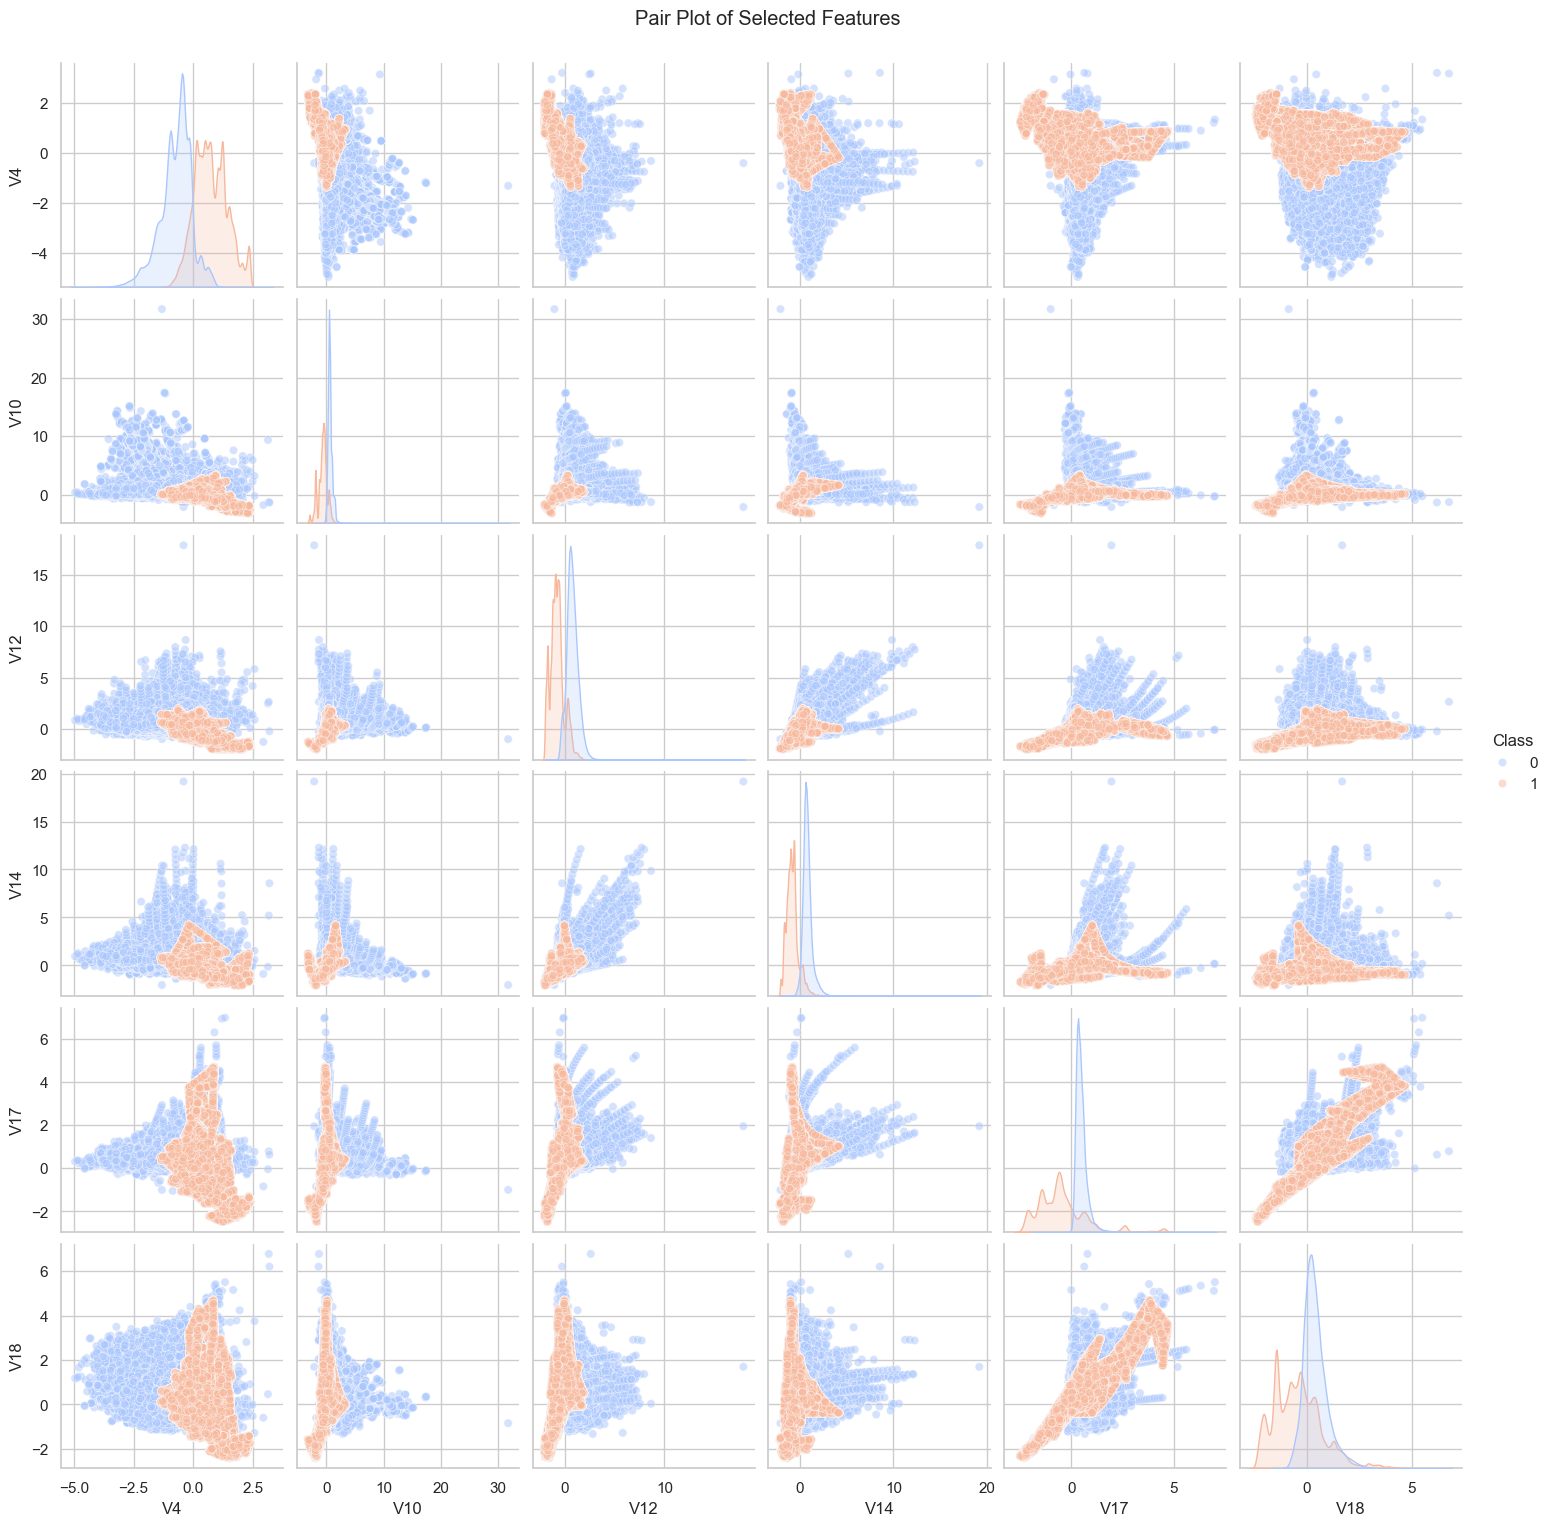

In [17]:
# Pair plot for selected features, colored by Class
sns.pairplot(data, vars=['V4', 'V10', 'V12', 'V14', 'V17', 'V18'], hue='Class', palette="coolwarm", plot_kws={'alpha':0.5})
plt.suptitle("Pair Plot of Selected Features", y=1.02)
plt.show()

### Distribution Analysis by Time

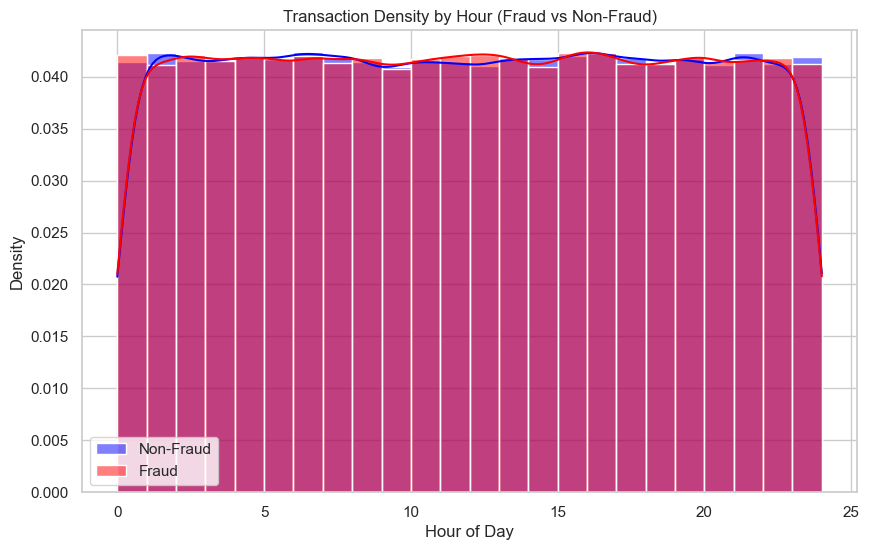

In [18]:
import numpy as np

# Add a fake 'Time' column with random times for demonstration
np.random.seed(42)
data['Time'] = np.random.randint(0, 86400, data.shape[0])  # Random time in seconds within a day

# Assuming 'Time' is available in seconds from the first transaction
# Converting Time to hours for easier interpretation
data['Hour'] = (data['Time'] / 3600) % 24

# Plot number of transactions by hour, separated by fraud and non-fraud
plt.figure(figsize=(10, 6))
sns.histplot(data[data['Class'] == 0]['Hour'], bins=24, color='blue', label='Non-Fraud', kde=True, stat='density')
sns.histplot(data[data['Class'] == 1]['Hour'], bins=24, color='red', label='Fraud', kde=True, stat='density')
plt.xlabel('Hour of Day')
plt.ylabel('Density')
plt.title('Transaction Density by Hour (Fraud vs Non-Fraud)')
plt.legend()
plt.show()

### Feature Scaling and Transformation Exploration

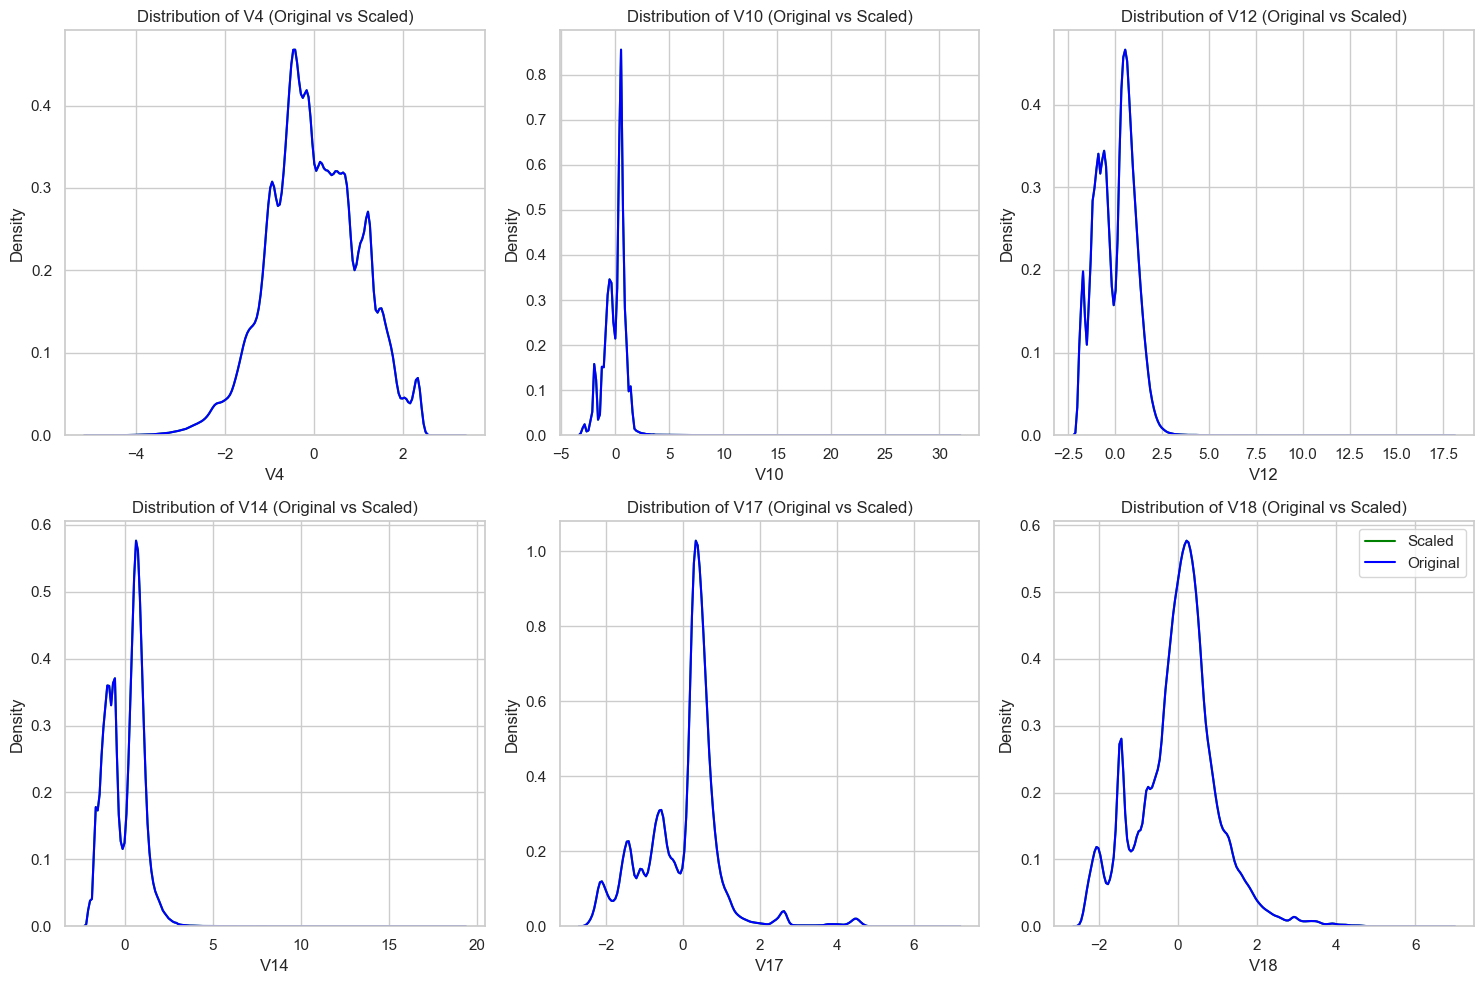

In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardize selected features for modeling
scaler = StandardScaler()
data_scaled = data.copy()
data_scaled[['V4', 'V10', 'V12', 'V14', 'V17', 'V18']] = scaler.fit_transform(data[['V4', 'V10', 'V12', 'V14', 'V17', 'V18']])

# Visualize the distributions after scaling
plt.figure(figsize=(15, 10))
for i, feature in enumerate(['V4', 'V10', 'V12', 'V14', 'V17', 'V18'], 1):
    plt.subplot(2, 3, i)
    sns.kdeplot(data_scaled[feature], label='Scaled', color='green')
    sns.kdeplot(data[feature], label='Original', color='blue')
    plt.title(f'Distribution of {feature} (Original vs Scaled)')
plt.tight_layout()
plt.legend()
plt.show()

### Feature Importance Using a Basic Model (Random Forest)

/var/folders/cy/rbvbhftd10z1_psbzn5n8gfh0000gp/T/ipykernel_31933/2675554390.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance, y=features, palette="viridis")


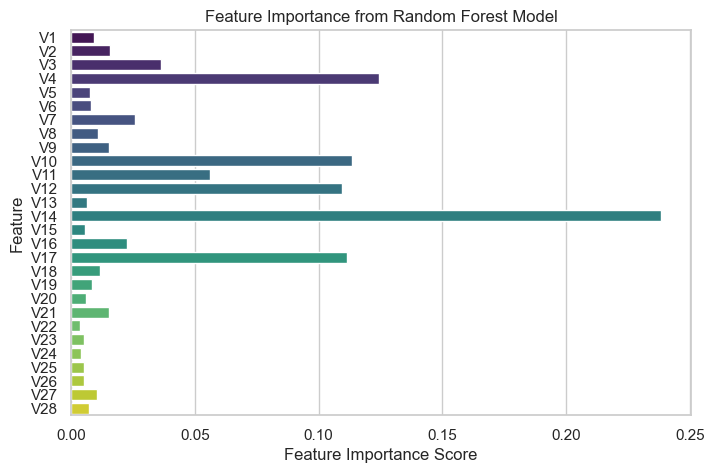

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Define features and target
features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28' ]
X = data[features]
y = data['Class']

# Train a random forest classifier to get feature importance
model = RandomForestClassifier(random_state=1)
model.fit(X, y)

# Plot feature importance
importance = model.feature_importances_
plt.figure(figsize=(8, 5))
sns.barplot(x=importance, y=features, palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance from Random Forest Model")
plt.show()

/var/folders/cy/rbvbhftd10z1_psbzn5n8gfh0000gp/T/ipykernel_31933/1613066288.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance, y=features, palette="viridis")


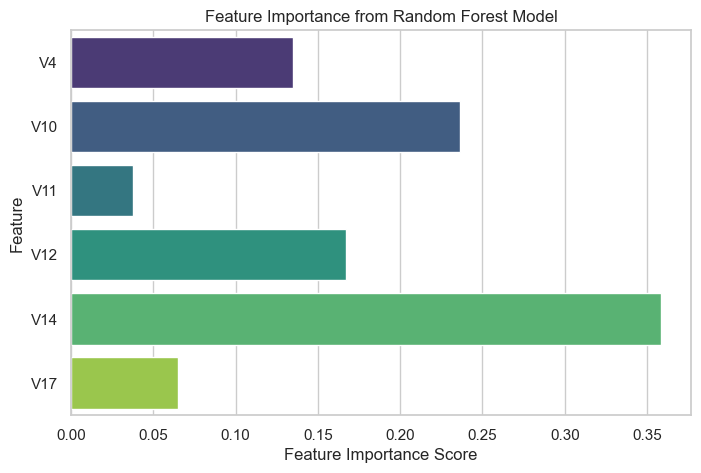

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Define features and target
features = ['V4', 'V10', 'V11', 'V12', 'V14', 'V17']
X = data[features]
y = data['Class']

# Train a random forest classifier to get feature importance
model = RandomForestClassifier(random_state=1)
model.fit(X, y)

# Plot feature importance
importance = model.feature_importances_
plt.figure(figsize=(8, 5))
sns.barplot(x=importance, y=features, palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance from Random Forest Model")
plt.show()

### Cluster Analysis (Using t-SNE for Visualization)

In [ ]:
from sklearn.manifold import TSNE

# Using t-SNE to reduce dimensionality to 2D for visualization
tsne = TSNE(n_components=2, random_state=1)
X_tsne = tsne.fit_transform(data[features])

# Plotting t-SNE with fraud and non-fraud labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=data['Class'], palette="coolwarm", alpha=0.6)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Clustering of Transactions (Fraud vs Non-Fraud)")
plt.legend(title="Class", labels=['Non-Fraud', 'Fraud'])
plt.show()

In [25]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting important features based on previous analysis
features = ['V4', 'V10', 'V12', 'V14', 'V17', 'V21']
X = data[features]
y = data['Class']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Scale the features
scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_test = scaler.transform(X_test)

# Initialize Random Forest classifier
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Hyperparameter tuning with GridSearchCV (Optional)
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10]
# }
# grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring='roc_auc')
# grid_search.fit(X_train_smote, y_train_smote)
# rf_model = grid_search.best_estimator_

# Fit the Random Forest model
rf_model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [26]:
# Predict on test data
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluation Metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_pred_proba))

Confusion Matrix:
[[56775    88]
 [   23 56840]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

AUC-ROC Score: 0.9999636679742498


Precision-Recall AUC: 0.9999610367733501


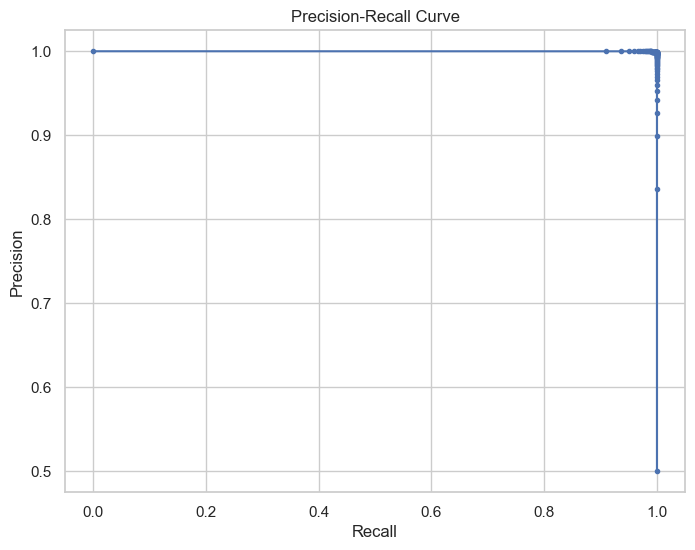

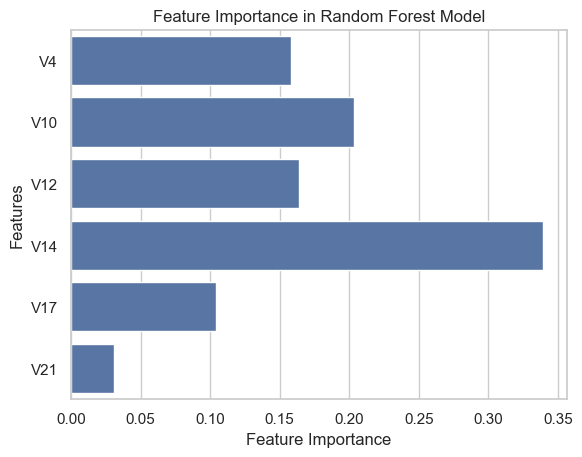

In [27]:
# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
prc_auc = auc(recall, precision)
print("Precision-Recall AUC:", prc_auc)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Feature Importance Plot
feature_importances = rf_model.feature_importances_
sns.barplot(x=feature_importances, y=features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest Model')
plt.show()
